# Explore Tips Dataset

In this notebook, we will be exploring the "Tips" dataset using the data visualization library "Seaborn".

Let's start by importing the seaborn library

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The "tips" dataset comes with the seaborn module.

In [2]:
tips = sns.load_dataset('tips')

Check the head of the dataset to have an overview of snapshot of dataset loaded.

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## First thoughts

Looks like the data shows the total bill payed by a group going for lunch or dinner.

Also shows the tip payed. Is the tip also included in the total bill? It isn't! This is US data. Capitalism is king.

The sex is given. But does it represent who paid the bill or who recived it? Checked. The one who is paying.

The group size is also given, also if its a smoker group.

Day is mentioned too. Wonder if all the days of the week is mentioned?

**How many days of the week is in the dataset?**

In [4]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

So the weekend and the days running up to it. Well thats usually when the restaurents are populated.

**How about an overview of the dataset?**

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


So we are dealing with 244 entries. Pretty small dataset, great for exersize.

Also no null values, that's great news!

**Lets see the distribution of total bills**

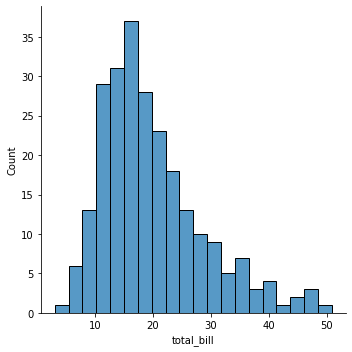

In [6]:
sns.displot(tips['total_bill'], bins=20)

Looks like the most of the bill between 10 - 25 dollars.

Wonder how the distribution differs between time.

**Actually how many time values are there?**

In [7]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

**Lets see how the distribution varies between lunch and dinner:**

In [8]:
dinner_df = tips[tips['time'] == 'Dinner']
dinner_df['total_bill'].describe()

count    176.000000
mean      20.797159
std        9.142029
min        3.070000
25%       14.437500
50%       18.390000
75%       25.282500
max       50.810000
Name: total_bill, dtype: float64

In [9]:
lunch_df = tips[tips['time'] == 'Lunch']
lunch_df['total_bill'].describe()

count    68.000000
mean     17.168676
std       7.713882
min       7.510000
25%      12.235000
50%      15.965000
75%      19.532500
max      43.110000
Name: total_bill, dtype: float64

Text(0.5, 1.0, 'Lunch')

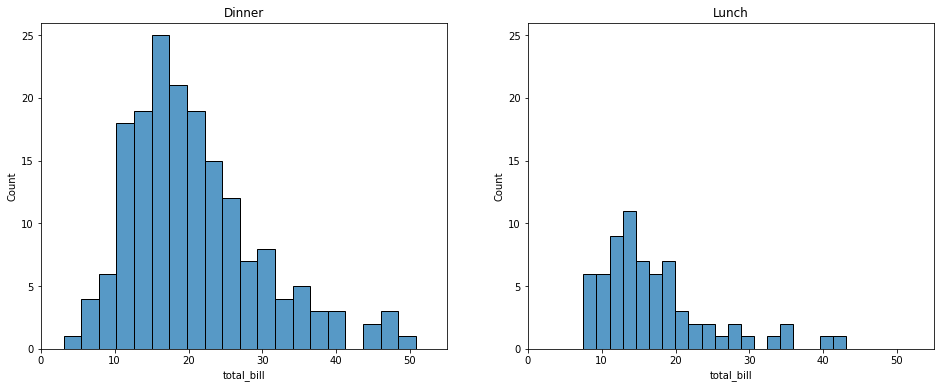

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
sns.histplot(dinner_df['total_bill'], ax=ax[0], bins=20)
sns.histplot(lunch_df['total_bill'], ax=ax[1], bins=20)
ax[0].set_ylim([0, 26])
ax[0].set_xlim([0, 55])
ax[0].set_title('Dinner')
ax[1].set_ylim([0, 26])
ax[1].set_xlim([0, 55])
ax[1].set_title('Lunch')

So a lot more people went for dinner and also paid more for it than lunch.

**What is the relationship between total bill and the respective tip given?**

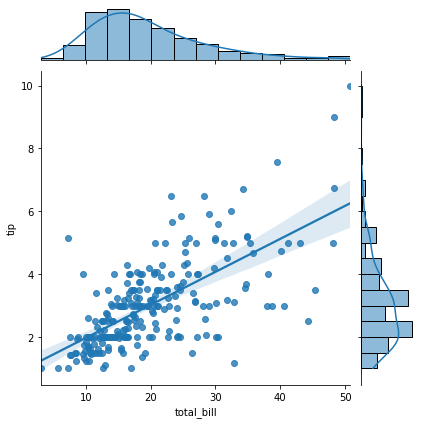

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

The tip amount rises as the total bill amount rises. Makes sense.

Wonder how tips compare with time?

**Compare tip vs total bill between lunch and dinner time**

Text(0.5, 1.0, 'Lunch')

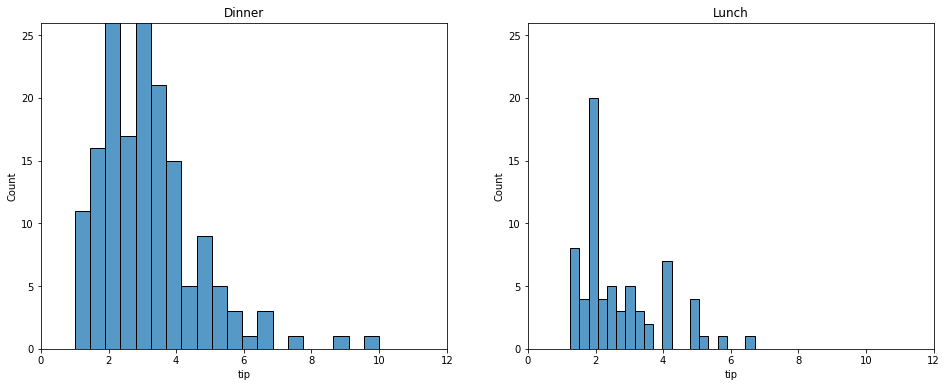

In [12]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
sns.histplot(dinner_df['tip'], ax=ax[0], bins=20)
sns.histplot(lunch_df['tip'], ax=ax[1], bins=20)
ax[0].set_ylim([0, 26])
ax[0].set_xlim([0, 12])
ax[0].set_title('Dinner')
ax[1].set_ylim([0, 26])
ax[1].set_xlim([0, 12])
ax[1].set_title('Lunch')

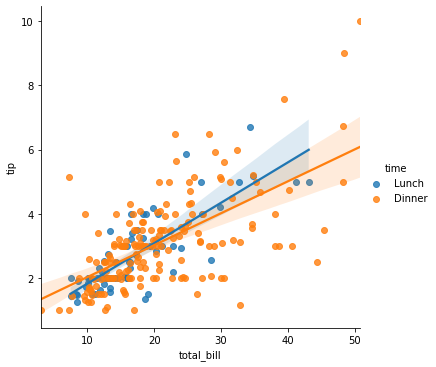

In [13]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='time')

There does not seem to be major difference in the tip given based on time. For average bill amount, the tip given for dinner is slightly higher than that in lunch.

So servers in certain time slot are not actually missing out.

**I wonder how the group size affects the situation.**

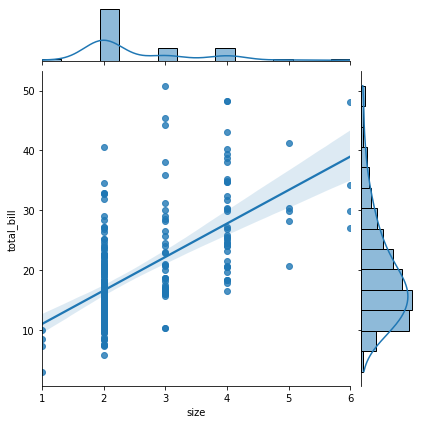

In [14]:
sns.jointplot(x='size',y='total_bill',data=tips,kind='reg')

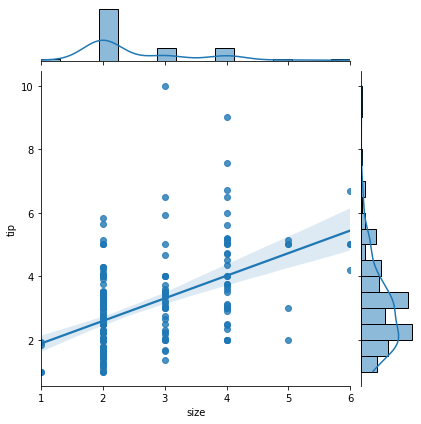

In [15]:
sns.jointplot(x='size',y='tip',data=tips,kind='reg')

Larger groups pays more and also tips more.

**Lets explore relationship of date with respective to tips given.**

**How many payments are there for each day?**

<AxesSubplot:xlabel='day', ylabel='count'>

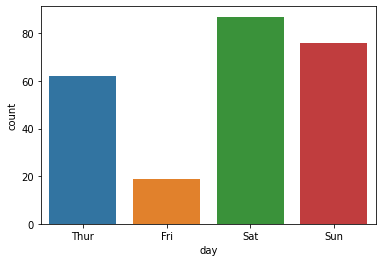

In [31]:
sns.countplot(x='day',data=tips)

As expected, weekends are really popular time to visit a restaurent.


Why is there so few customers on Fridays though? I would have expected more customers as people may like to chill out in restaurents before weekend starts.

**How does the bills and tips compare between different days?**

<AxesSubplot:xlabel='day', ylabel='tip'>

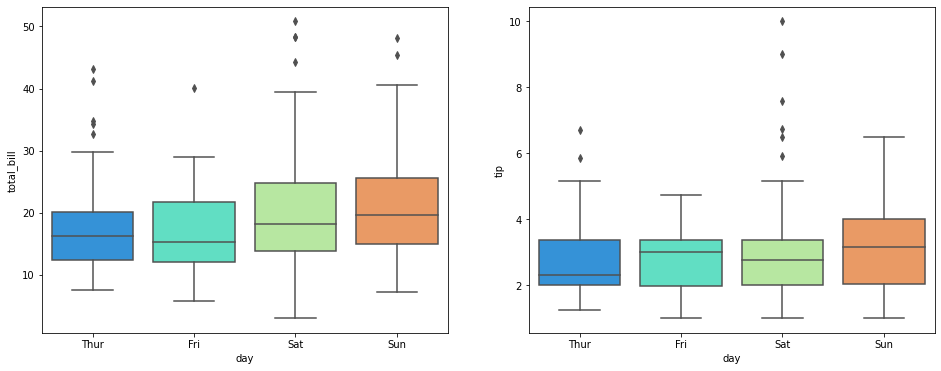

In [22]:
fig2, box_ax = plt.subplots(1,2, figsize=(16, 6))
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow',ax=box_ax[0])
sns.boxplot(x="day", y="tip", data=tips,palette='rainbow',ax=box_ax[1])

<AxesSubplot:xlabel='day', ylabel='tip'>

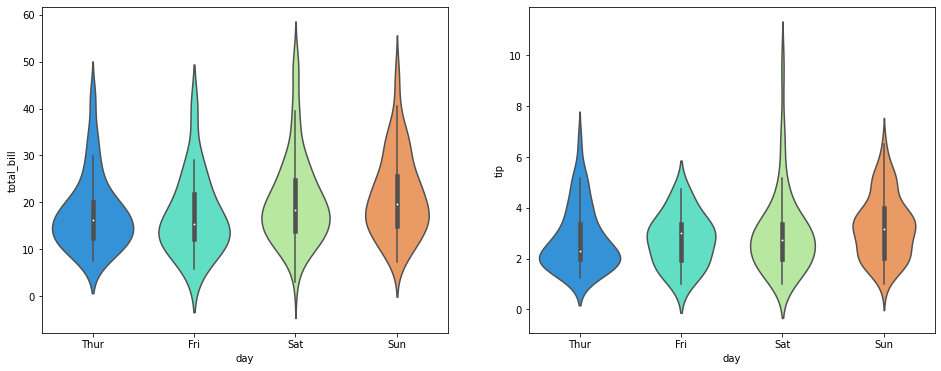

In [23]:
fig3, vio_ax = plt.subplots(1,2, figsize=(16, 6))
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow',ax=vio_ax[0])
sns.violinplot(x="day", y="tip", data=tips,palette='rainbow',ax=vio_ax[1])

<AxesSubplot:xlabel='day', ylabel='tip'>

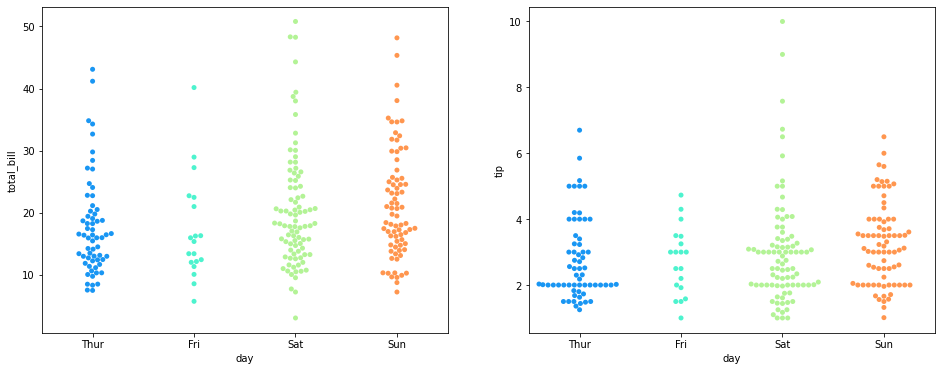

In [24]:
fig4, swarm_ax = plt.subplots(1,2, figsize=(16, 6))
sns.swarmplot(x="day", y="total_bill", data=tips, palette='rainbow',ax=swarm_ax[0])
sns.swarmplot(x="day", y="tip", data=tips, palette='rainbow',ax=swarm_ax[1])

Looks like the weekends are a safe bet to recive larger tips as people frequent often to restaurent and spend large amount.

**Wonder how group sizes differ between days?**

<AxesSubplot:xlabel='day', ylabel='tip'>

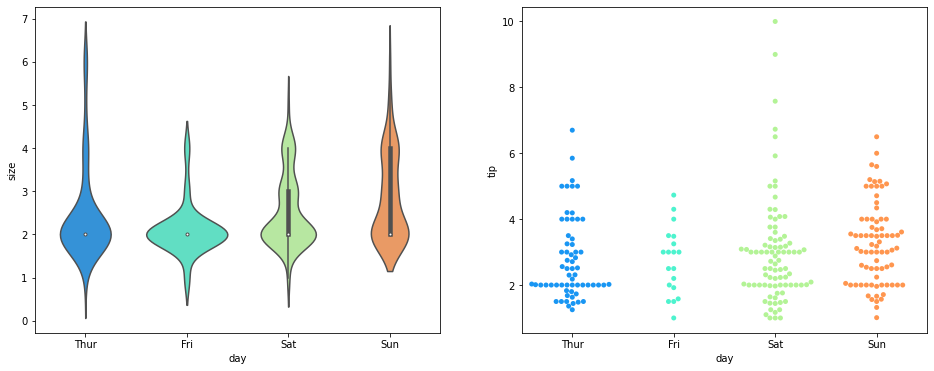

In [25]:
fig4, grp_size_ax = plt.subplots(1,2, figsize=(16, 6))
sns.violinplot(x="day", y="size", data=tips,palette='rainbow',ax=grp_size_ax[0])
sns.swarmplot(x="day", y="tip", data=tips, palette='rainbow',ax=grp_size_ax[1])

Looks like weekends are a nice time for larger groups e.g. family especially on Sunday.

Nice day to get some large tips...

<AxesSubplot:xlabel='day', ylabel='count'>

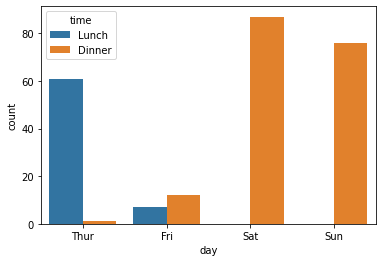

In [27]:
sns.countplot(x='day',data=tips, hue='time')

Woah! I didn't expect that. We already knew Friday was a low count day.

On Thursday barely anyone has dinner. Which makes sense I guess. Possibly only office goers going for lunch.

But on weekends, no is having lunch at all. What?

Well as restaurent owner it definitely makes sense to get part-timers rather than full-timers to account for the customer rush at different times in different days.

Lets review the impact of gender paying the bill on the tips.

**First of all how many counts of male and female payers are there?**

<AxesSubplot:xlabel='sex', ylabel='count'>

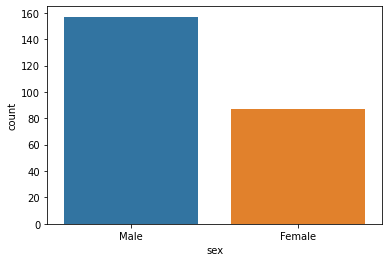

In [34]:
sns.countplot(x='sex',data=tips)

Looks like there are lot more male bill payers.

**How is sex distribution across days?**

<AxesSubplot:xlabel='day', ylabel='count'>

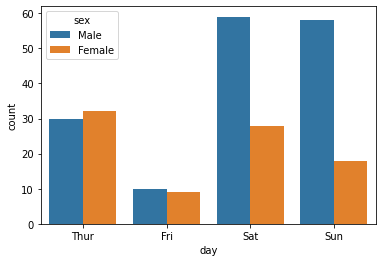

In [33]:
sns.countplot(x='day',data=tips, hue='sex')

Well. Interesting is that on Thursday and Friday, the count of male and female bill payers are the same. Quite different from weekends. My hypothesis is that these are mostly office people on weekdays, paying their own bills and collegues.

**Does gender have any effect on tips?**

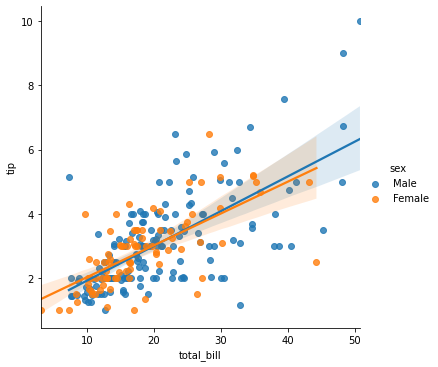

In [37]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

No effect. Both male and female are ~~as stingy as other~~ paying similar amount w.r.t. total bill.

**What about smokers?**

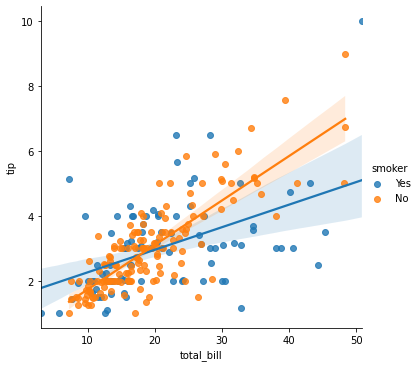

In [39]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker')

Oh wow. Looks like there is indeed some difference.

<AxesSubplot:xlabel='smoker', ylabel='tip'>

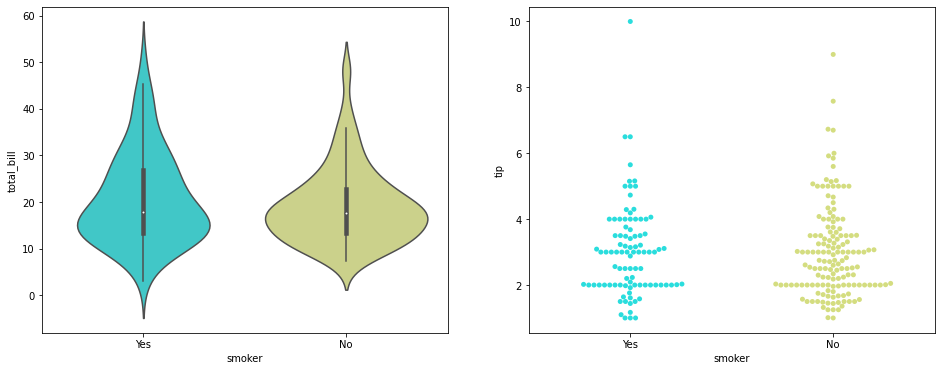

In [41]:
fig_smoker, smoker_ax = plt.subplots(1,2, figsize=(16, 6))
sns.violinplot(x="smoker", y="total_bill", data=tips,palette='rainbow',ax=smoker_ax[0])
sns.swarmplot(x="smoker", y="tip", data=tips, palette='rainbow',ax=smoker_ax[1])

Looks like non-smoker group, gives a better tip.

**Hmm. Does smokers like to come in a group or alone? Also which days do they prefer?**

<AxesSubplot:xlabel='day', ylabel='count'>

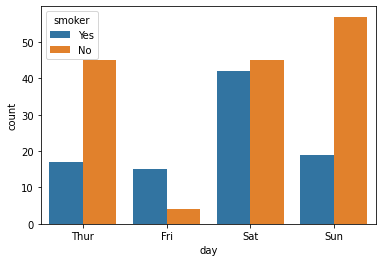

In [42]:
sns.countplot(x='day',data=tips, hue='smoker')

<AxesSubplot:xlabel='size', ylabel='count'>

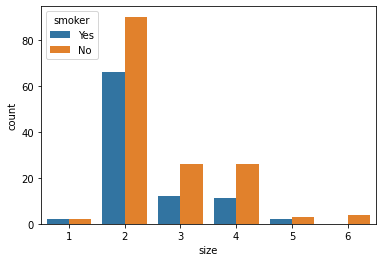

In [48]:
sns.countplot(x='size',data=tips, hue='smoker')

Nothing to see here, smokers come with all size groups and days.

## Conclusion

For restaurent servers, weekends are the best days to get nice tips. Serving larger groups nicely may bring great benefits.

For restaurent owners, really need to be flexible with employee time as certain days and timeslots may be busier than others. Part-timer employees will be more preferable to allow for the flexibility.